In [2]:
from gymnasium import spaces
import numpy as np

In [3]:
actionSpace = spaces.Box(
            low=np.zeros(4),
            high=np.ones(4),
            dtype=np.float32
        )

/home/led/miniconda3/lib/python3.11/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [12]:
actionSpace

Box(0.0, 1.0, (4,), float32)

In [11]:
spaces.Box(
            low=np.zeros(actionSpace.shape),
            high=np.ones(actionSpace.shape),
            dtype=np.float32
        )

/home/led/miniconda3/lib/python3.11/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Box(0.0, 1.0, (4,), float32)

pybullet build time: Sep 27 2023 23:43:15
/home/led/miniconda3/lib/python3.11/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


AXS 0.0794
CAM VIS


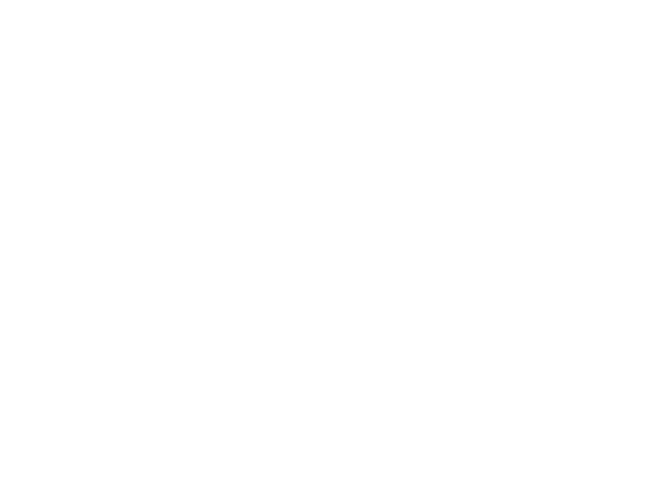

In [5]:
import numpy as np
import pybullet as pb

from gym_pybullet_drones.vehicles import QuadCopter
from gym_pybullet_drones.devices import Camera, mpu6000
from gym_pybullet_drones.envs import Base
from gym_pybullet_drones.utils.state import State

from gym_pybullet_drones.utils.utils import sync, str2bool
import time


# def run():
client = pb.connect(pb.DIRECT)

sensors= [
    Camera(
        image_size = [640, 480],
        fov= 60,
        displ = np.array([0, 0, 0.1]),
        frequency = 60
    ),
    mpu6000()
    ]

state = State()
state.world.pos[2] += 0.1

drone = QuadCopter(
    client=client,
    filename= 'custom.urdf',#'cf2x_cam.urdf',
    # sensors = [],
    sensors = sensors,
    state=state)

env = Base(
        client=client,
        drone=drone,
        control_system=None
    )

In [6]:
env.observation_space.items()

ItemsView(Dict('IMU_0': Box(-inf, inf, (1, 3), float32), 'camera_0': Tuple(Box(-inf, inf, (480, 640, 4), float32), Box(-inf, inf, (480, 640), float32), Box(-inf, inf, (480, 640), float32))))

In [8]:
env.action_space

Box(0.0, 1.0, (4,), float32)

In [15]:
np.concatenate((np.ones((3,)), np.ones((3,))))

array([1., 1., 1., 1., 1., 1.])

In [7]:
isinstance(env.observation_space, spaces.Dict)

if isinstance(env.observation_space, spaces.Dict):
    for k, v in env.observation_space.items():
        # env.observation_space[k] = 
        print(k, v)

IMU_0 Box(-inf, inf, (1, 3), float32)
camera_0 Tuple(Box(-inf, inf, (480, 640, 4), float32), Box(-inf, inf, (480, 640), float32), Box(-inf, inf, (480, 640), float32))
